In [ ]:
#------------------------------------------------------------------------------
# Summary       : This program creates a simple bar chart to present the Covid
#                 vaccination statistics for countries in Europe, Asia, Americas
#                 and Africa. The vaccine data is taken from a csv file 
#                 downloaded from the Johns Hopkins Covid data hub at 
#                 https://coronavirus.jhu.edu/data/new-cases
#                 This program was written on Google Colab                 
#------------------------------------------------------------------------------

In [ ]:
# Import and pip install statments needed for Google Colab

import csv
import pandas as pd
import matplotlib.pyplot as plt
#!pip install countryinfo
from countryinfo import CountryInfo

In [ ]:
# Creating a list containing all countries recognized by the countryinfo
# package. All the countries in this list are completely lowercase

country = CountryInfo()
Countries = country.all().keys()

def vaccineData(dictionary, region): 

  region_countries = {}

  # All entries from the csv file are checked to see if it is a valid country by  
  # checking to see if it exists in the Countries list created above. If it is a 
  # recognized country it will further check to see if it is in the region. If 
  # it is a country in the region, it is added to a dictionary called 
  # region_countries and uses the name of the country as the key 

  for i in dictionary:
    c = i.lower()
    country = CountryInfo(i)
    try: 
      if c in Countries: 
        if country.region()==region: 
          region_countries[i] = dictionary[i]
        else: 
          #print(i, "is not a recognized country")
          pass
    except:
      #print("Error reading country") 
      pass
  
  data = {}

  # All countries are checked to see if they have a population above 2 million. 
  # If they do have a population above 2 million they are added to a dictionary 
  # called data

  for i in region_countries: 
    country = CountryInfo(i)
    if country.population()>=2000000: 
      data[i] = region_countries[i]
  
  plottable = []
  value = []
  
  # Here we go through every country from the data dictionary above and 
  # calculate the parameters that need to be plotted. We create a new list 
  # called plottable that stores the normalized and percentage values of the 
  # partially vaccinated population, fully vaccinated population and country 
  # name
  
  for i in data: 
    country = CountryInfo(i)
    par_vac = (float(data[i][3])/country.population())*100
    full_vac = (float(data[i][4])/country.population())*100
    value = par_vac, full_vac, i
    plottable.append(value)

  plotGraph(plottable, region)

  return 

In [ ]:
# This function takes in a list and separates and plots the data

def plotGraph(plottable, region): 
  
  # The plottable list is sorted in descending order based on the value of the 
  # percentage of population that is partially vaccinated 
  
  n = len(plottable)
  for i in range(0, n): 
    for j in range(0, n-i-1): 
      if (plottable[j][0] < plottable[j + 1][0]): 
        temp = plottable[j]
        plottable[j]= plottable[j + 1]
        plottable[j + 1]= temp 
  
  plot_bottom = []
  plot_top = []
  plot_countries = []
  
  # We extract the plotting parameters from the plottable list into three 
  # different lists that contain the percentage values of the fully 
  # vaccinated population (bottom part of each bar in the bar graph), percentage
  # values of the partially vaccinated population above that of the fully 
  # vaccinated population (top part of each bar in the bar graph) and the
  # corresponding countries. The individial lists are sorted in descending order 
  # based on the value of the percentage of population that is partially 
  # vaccinated
  
  for i in range(0,len(plottable)): 
    plot_top.append(plottable[i][0]-plottable[i][1])
    plot_bottom.append(plottable[i][1])
    plot_countries.append(plottable[i][2])

  # We use the three lists above to plot the graph to look exactly like the 
  # format showed in the Assignment description 

  width=0.9
  fig = plt.figure()
  
  # The numbers below were adjustted from [0,0,1,1] so that the saved image 
  # contains the axis, axis labels, graph title and graph legend. Some of the
  # names of the countries cut off in the saved image similar to that of the 
  # image showed in the Assignment desciption
  
  ax = fig.add_axes([0.1,0.19,0.85,0.75])
  ax.bar(plot_countries, plot_top, width, bottom=plot_bottom, color="black")
  ax.bar(plot_countries, plot_bottom, width, color="purple")
  ax.set_ylabel("Percentage Vaccinated")
  plt.xticks(rotation=90)
  ax.set_title("Vaccination Rates Across " + region)
  ax.legend(labels=["Partially Vaccinated (%)", "Fully Vaccinated (%)"])
  plt.show()

  return 

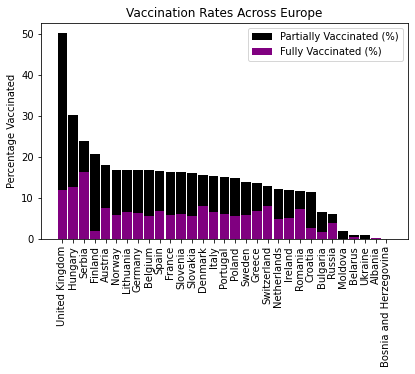

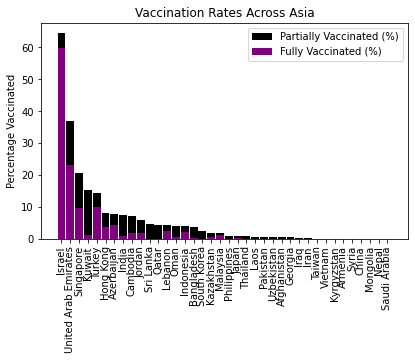

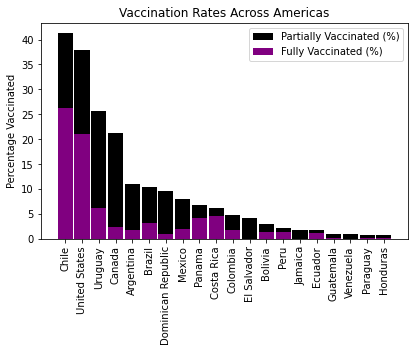

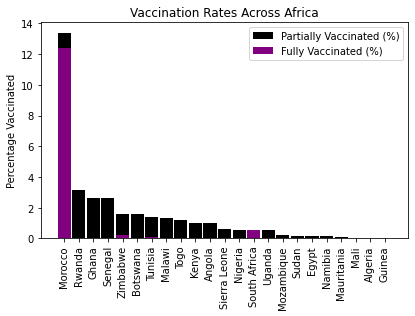

In [ ]:
# Main
# This part of the program will call the vaccineData function for the 4 major
# regions of the world specified in the region list below 

dataFile = "vaccine_data_global.csv"
region = ["Europe", "Asia", "Americas", "Africa"]

vaccine_data = {}

# Reading the csv file into a dictionary that uses country name as the key
with open(dataFile, newline='') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    # This line is long because indending it caused errors in reading the file
    vaccine_data[row["Country_Region"]] = row["Country_Region"], row["Date"], row["Doses_admin"], row["People_partially_vaccinated"], row["People_fully_vaccinated"], row["Report_Date_String"], row["UID"]

for i in range(0,len(region)): 
  vaccineData(vaccine_data, region[i])